# Data Analysis : House Price 

## Notebook 2 , apply the preprocessing recommendations from notebook 1 

In [549]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [551]:
pip install plotly


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [552]:
data = pd.read_csv("/Users/reemyalfaisal/Downloads/Housing-2.csv") 

In [553]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [554]:
data.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


## **Endogenous Variable** :
**price**: The target variable, representing the cost of the property in monetary units. It is of type int64 and contains 545 non-null values.
## **Explanatory Variable** :
The explanatory variables are those that could influence the price of a house. Based on the available data

**Area** : Total size of the house in square meters. Of type int64, with 545 non-null values.

**Bedrooms** : Total number of bedrooms. Of type int64, 545 non-null values.

**Bathrooms** : Total number of bathrooms. Of type int64, with 545 non-null values.

**Stories** : Indicates if the house has one or multiple stories. Of type int64, 545 non-null values.

**Mainroad** : Indicates proximity to a main road (Yes/No). Type object, 545 non-null values.

**Guestroom** : Indicates if the house has a guestroom (Yes/No). Type object, 545 non-null values.

**Basement** : Indicates the presence of a basement (Yes/No). Type object, 545 non-null values.

**Hotwaterheating** : Presence of a hot water heating system (Yes/No). Type object, 545 non-null values.

**Airconditioning** : Indicates if the house has an air conditioning system (Yes/No). Type object, 545 non-null values.

**Parking** : Number of parking spaces. Of type int64, with 545 non-null values.

**Prefarea** : Indicates if the house is in a preferred area (Yes/No). Type object, 545 non-null values.

**Furnishingstatus** : Indicates if the house is furnished, partially furnished, or unfurnished. Type object, with 545 non-null values.

# a. price

representing the cost of the property in monetary units

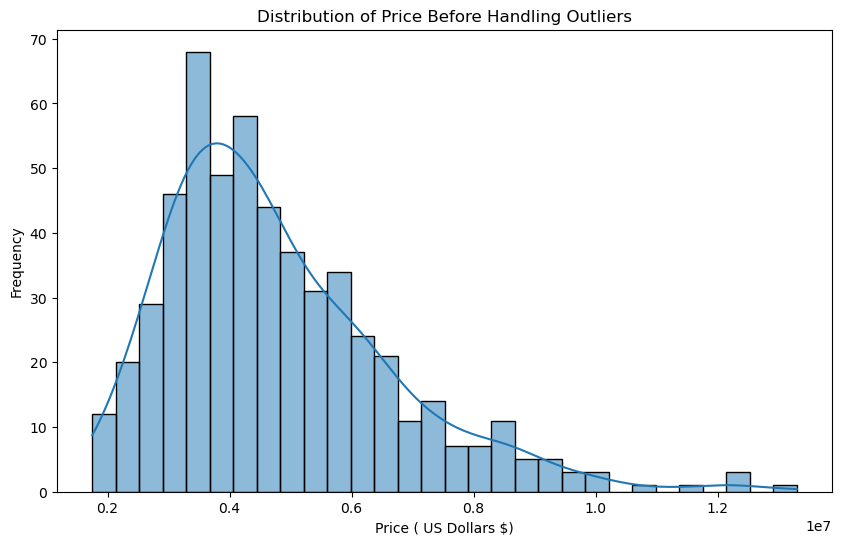

In [562]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Price Before Handling Outliers')
plt.xlabel('Price ( US Dollars $)')
plt.ylabel('Frequency')
plt.show()


In [564]:
# Detect outliers in 'price' using z-score
data['price_zscore'] = zscore(data['price'])
threshold = 4
price_outliers = data[np.abs(data['price_zscore']) > threshold]
print(f"Detected {len(price_outliers)} outliers in 'price' column.")


Detected 3 outliers in 'price' column.


In [566]:
# Remove outliers in 'price'
data = data[np.abs(data['price_zscore']) <= threshold]
data = data.drop(columns=['price_zscore'])


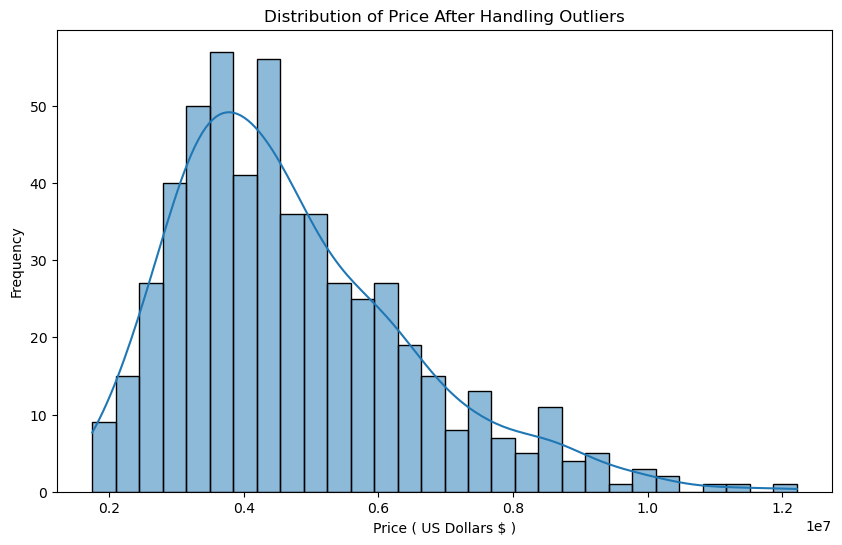

In [568]:
# Visualize 'price' after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Price After Handling Outliers')
plt.xlabel('Price ( US Dollars $ )')
plt.ylabel('Frequency')
plt.show()

# b. area

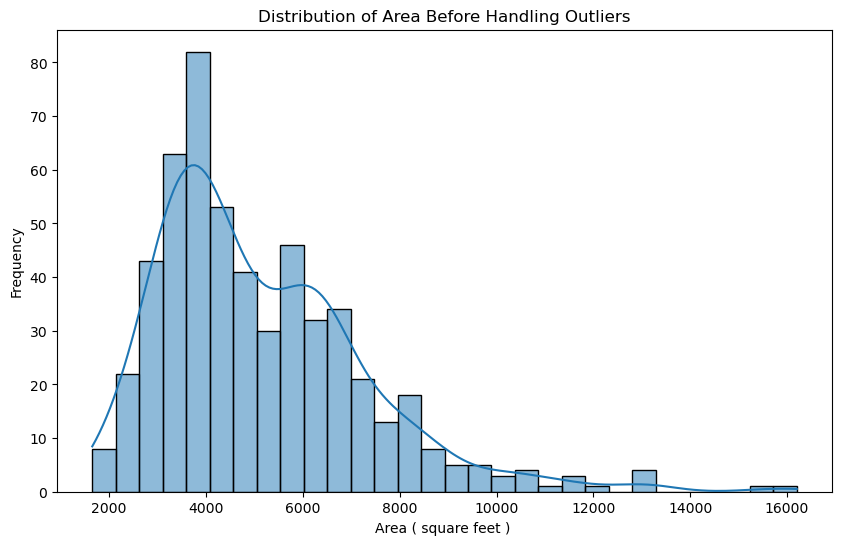

In [571]:
# Visualize 'area' before handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Area Before Handling Outliers')
plt.xlabel('Area ( square feet ) ')
plt.ylabel('Frequency')
plt.show()

In [573]:
# Detect outliers in 'area' using z-score
data['area_zscore'] = zscore(data['area'])
threshold = 4
area_outliers = data[np.abs(data['area_zscore']) > threshold]
print(f"Detected {len(area_outliers)} outliers in 'area' column.")


Detected 2 outliers in 'area' column.


In [575]:
# Remove outliers in 'area'
data = data[np.abs(data['area_zscore']) <= threshold]
data = data.drop(columns=['area_zscore'])


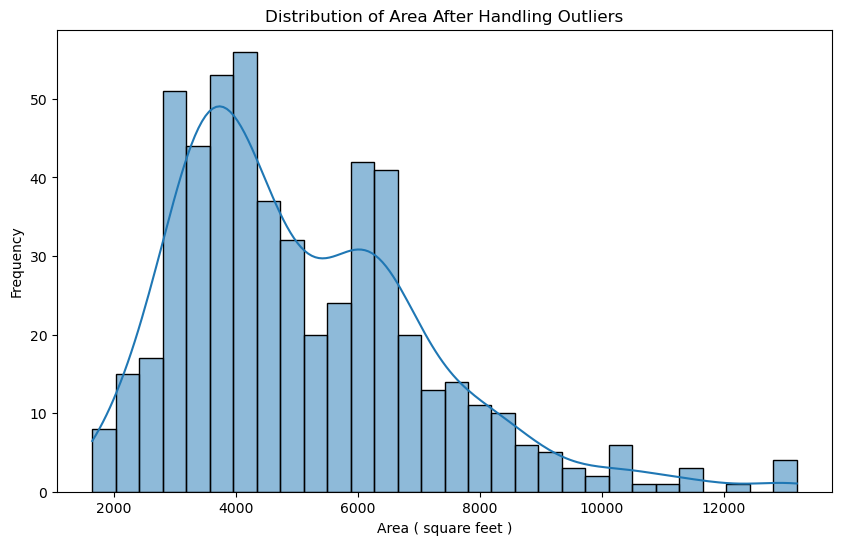

In [577]:
# Visualize 'area' after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Area After Handling Outliers')
plt.xlabel('Area ( square feet )')
plt.ylabel('Frequency')
plt.show()

# c. bedrooms

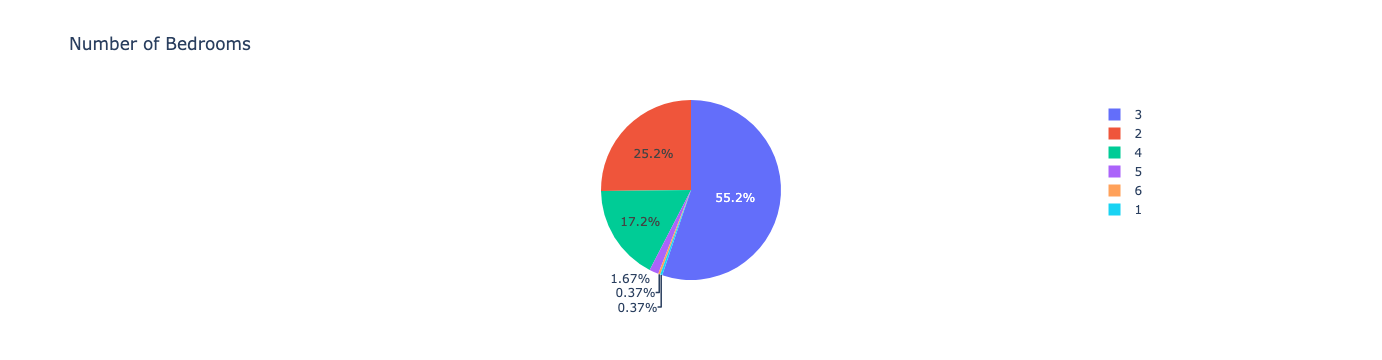

In [580]:
# Visualize 'bedrooms' using pie chart
bedrooms_counts = data['bedrooms'].value_counts()
fig = px.pie(bedrooms_counts, values=bedrooms_counts.values, names=bedrooms_counts.index, title='Number of Bedrooms')
fig.show()


In [582]:
# Detect outliers in 'bedrooms' using z-score
data['bedrooms_zscore'] = zscore(data['bedrooms'])
threshold = 4
bedrooms_outliers = data[np.abs(data['bedrooms_zscore']) > threshold]
print(f"Detected {len(bedrooms_outliers)} outliers in 'bedrooms' column.")


Detected 2 outliers in 'bedrooms' column.


In [584]:
# Remove outliers in 'bedrooms'
data = data[np.abs(data['bedrooms_zscore']) <= threshold]
data = data.drop(columns=['bedrooms_zscore'])

# d. bathrooms

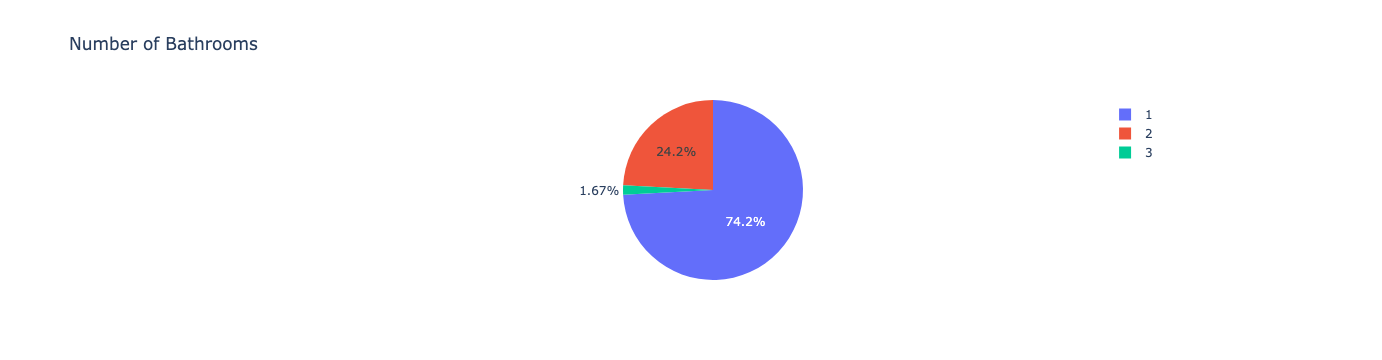

In [587]:
# Visualize 'bathrooms' using pie chart
bathrooms_counts = data['bathrooms'].value_counts()
fig = px.pie(bathrooms_counts, values=bathrooms_counts.values, names=bathrooms_counts.index, title='Number of Bathrooms')
fig.show()


In [589]:
# Detect outliers in 'bathrooms' using z-score
data['bathrooms_zscore'] = zscore(data['bathrooms'])
threshold = 3.5
bathrooms_outliers = data[np.abs(data['bathrooms_zscore']) > threshold]
print(f"Detected {len(bathrooms_outliers)} outliers in 'bathrooms' column.")


Detected 9 outliers in 'bathrooms' column.


In [591]:
# Remove outliers in 'bathrooms'
data = data[np.abs(data['bathrooms_zscore']) <= threshold]
data = data.drop(columns=['bathrooms_zscore'])

# e. stories

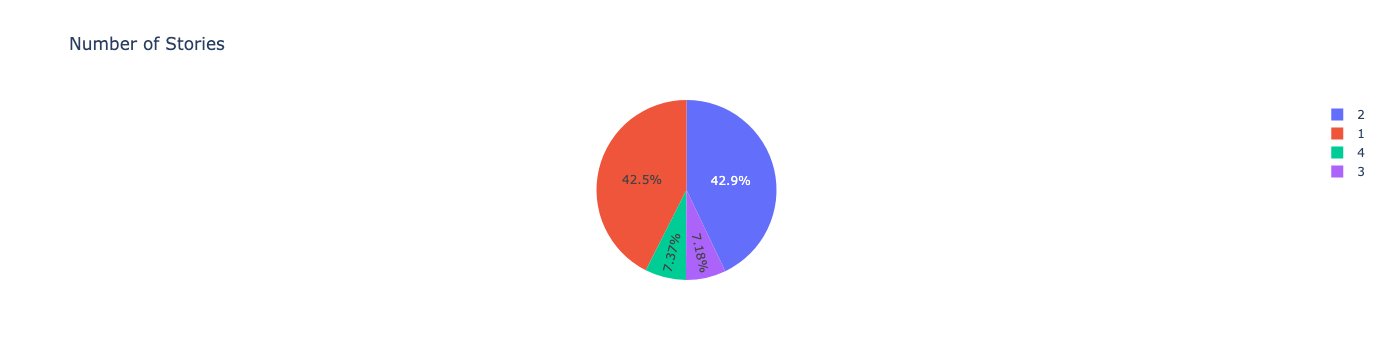

In [594]:
# Visualize 'stories' using pie chart
stories_counts = data['stories'].value_counts()
fig = px.pie(stories_counts, values=stories_counts.values, names=stories_counts.index, title='Number of Stories')
fig.show()

In [604]:
# Detect outliers in 'stories' using z-score
data['stories_zscore'] = zscore(data['stories'])
threshold = 3
stories_outliers = data[np.abs(data['stories_zscore']) > threshold]
print(f"Detected {len(stories_outliers)} outliers in 'stories' column.")


Detected 0 outliers in 'stories' column.


# f. parking

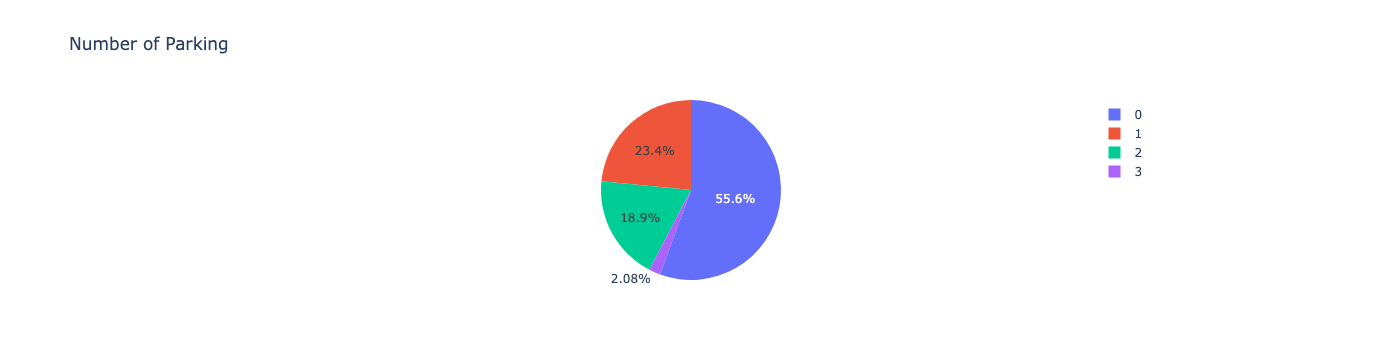

In [607]:
# Visualize 'parking' using pie chart
parking_counts = data['parking'].value_counts()
fig = px.pie(parking_counts, values=parking_counts.values, names=parking_counts.index, title='Number of Parking')
fig.show()

In [613]:
# Detect outliers in 'parking' using z-score
data['parking_zscore'] = zscore(data['parking'])
threshold = 3
parking_outliers = data[np.abs(data['parking_zscore']) > threshold]
print(f"Detected {len(parking_outliers)} outliers in 'parking' column.")


Detected 0 outliers in 'parking' column.


### a. mainroad

In [616]:
# Encode 'mainroad'
le_mainroad = LabelEncoder()
data['mainroad'] = le_mainroad.fit_transform(data['mainroad'])


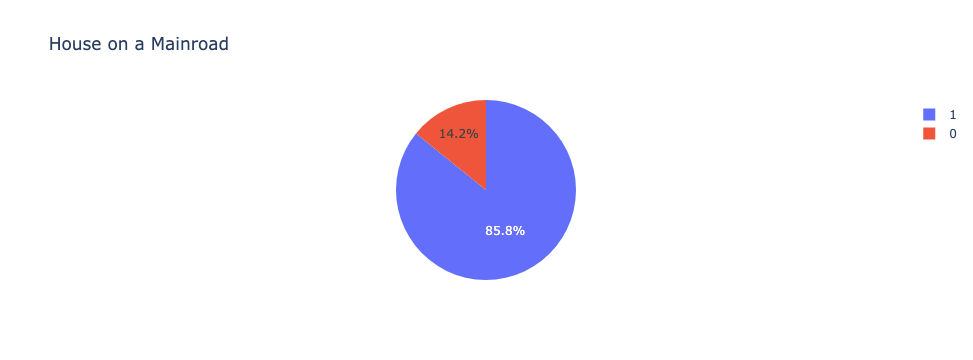

In [618]:
# Visualize 'mainroad' using pie chart
mainroad_counts = data['mainroad'].value_counts()
fig = px.pie(mainroad_counts, values=mainroad_counts.values, names=mainroad_counts.index, title='House on a Mainroad')
fig.show()

# b. guestroom

In [621]:
le_guestroom = LabelEncoder()
data['guestroom'] = le_guestroom.fit_transform(data['guestroom'])


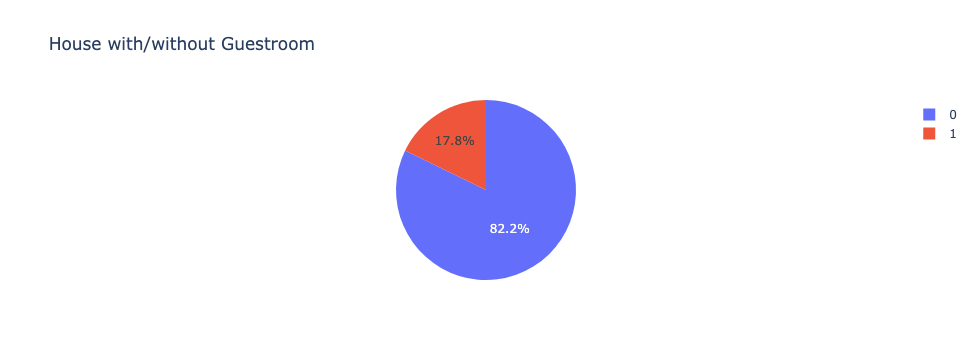

In [623]:
# Visualize 'guestroom' using pie chart
guestroom_counts = data['guestroom'].value_counts()
fig = px.pie(guestroom_counts, values=guestroom_counts.values, names=guestroom_counts.index, title=' House with/without Guestroom')
fig.show()

# c. basement

In [626]:
le_basement = LabelEncoder()
data['basement'] = le_basement.fit_transform(data['basement'])


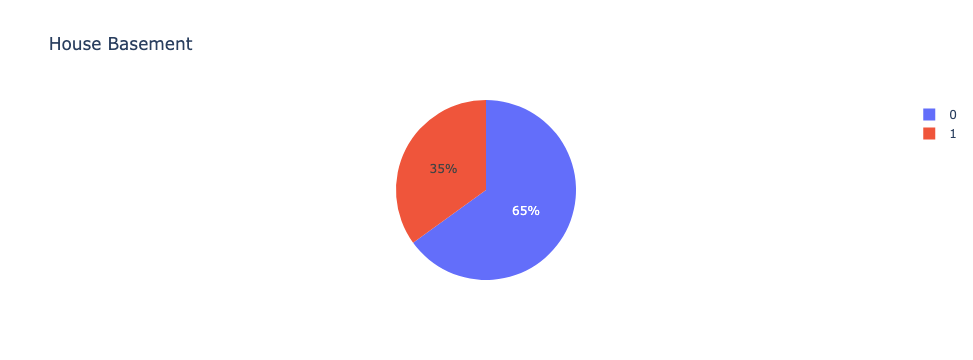

In [628]:
basement_counts = data['basement'].value_counts()
fig = px.pie(basement_counts, values=basement_counts.values, names=basement_counts.index, title='House Basement')
fig.show()

# d. hot water heating

In [631]:
le_hotwaterheating = LabelEncoder()
data['hotwaterheating'] = le_hotwaterheating.fit_transform(data['hotwaterheating'])

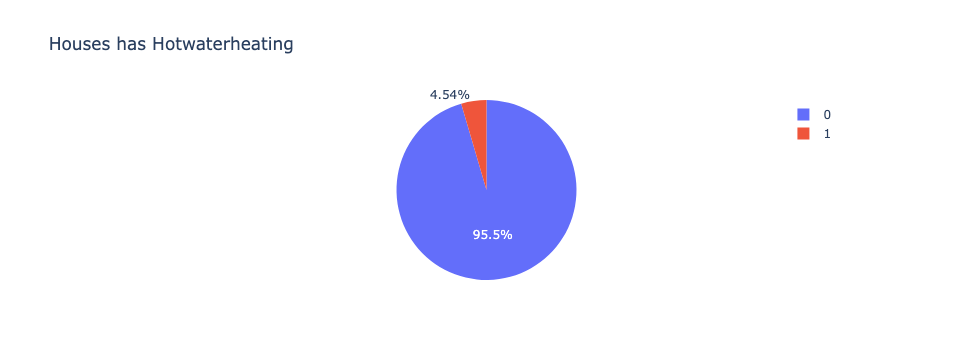

In [633]:
# Visualize 'hotwaterheating' using pie chart
hotwaterheating_counts = data['hotwaterheating'].value_counts()
fig = px.pie(hotwaterheating_counts, values=hotwaterheating_counts.values, names=hotwaterheating_counts.index, title='Houses has Hotwaterheating')
fig.show()

# e. air conditioning

In [636]:
le_airconditioning = LabelEncoder()
data['airconditioning'] = le_airconditioning.fit_transform(data['airconditioning'])

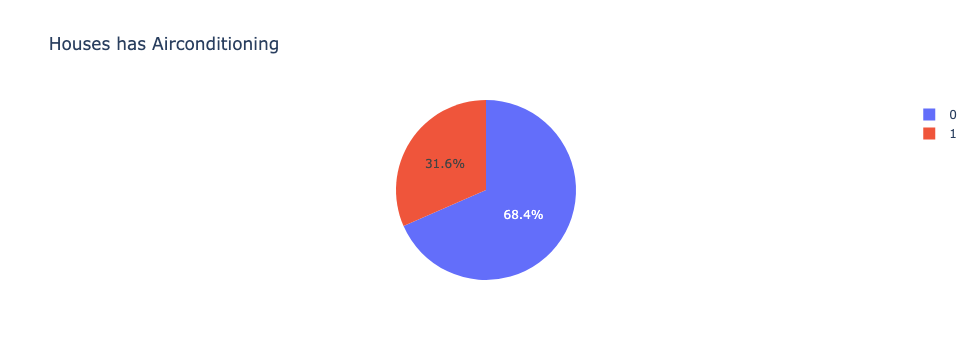

In [638]:
# Visualize 'airconditioning' using pie chart
airconditioning_counts = data['airconditioning'].value_counts()
fig = px.pie(airconditioning_counts, values=airconditioning_counts.values, names=airconditioning_counts.index, title='Houses has Airconditioning')
fig.show()

# f. prefarea

In [641]:
le_prefarea = LabelEncoder()
data['prefarea'] = le_prefarea.fit_transform(data['prefarea'])

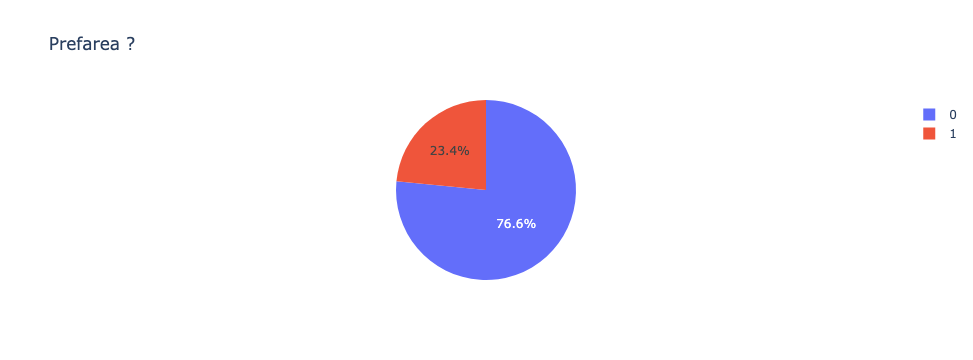

In [643]:
# Visualize 'prefarea' using pie chart
prefarea_counts = data['prefarea'].value_counts()
fig = px.pie(prefarea_counts, values=prefarea_counts.values, names=prefarea_counts.index, title=' Prefarea ?')
fig.show()

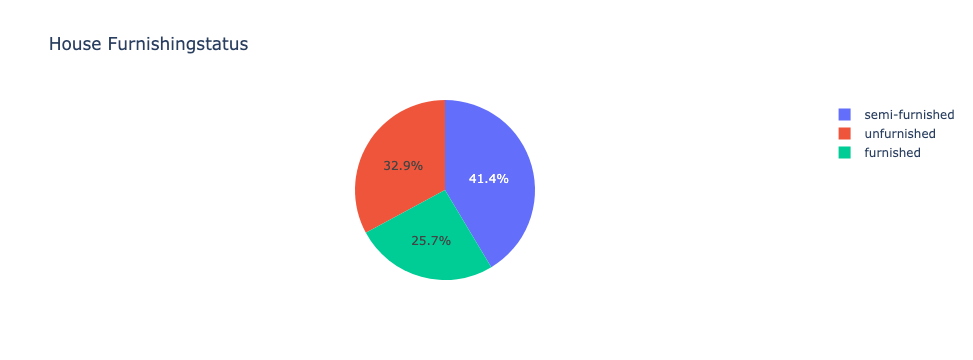

In [645]:
 #Visualize 'furnishingstatus' using pie chart
furnishingstatus_counts = data['furnishingstatus'].value_counts()
fig = px.pie(furnishingstatus_counts, values=furnishingstatus_counts.values, names=furnishingstatus_counts.index, title='House Furnishingstatus')
fig.show()

# g. furnishingstate 

In [648]:
le_furnishingstatus = LabelEncoder()
data['furnishingstatus'] = le_furnishingstatus.fit_transform(data['furnishingstatus'])

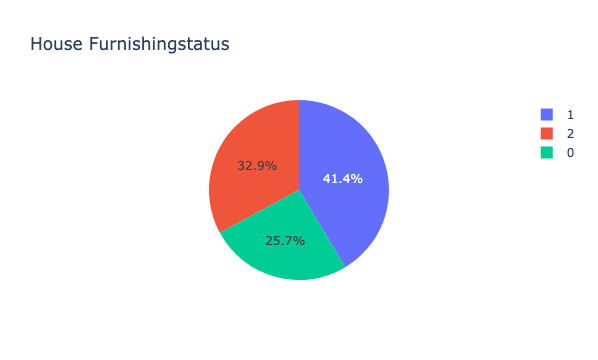

In [650]:
# Visualize 'furnishingstatus' using pie chart
furnishingstatus_counts = data['furnishingstatus'].value_counts()
fig = px.pie(furnishingstatus_counts, values=furnishingstatus_counts.values, names=furnishingstatus_counts.index, title='House Furnishingstatus')
fig.show()

# Preprocessing done

In [499]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_standardized,stories_zscore,parking_zscore
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,1.171057,0.237988,2.735915
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,1.132175,0.237988,1.559249
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,1.462675,0.237988,1.559249
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2,0.320505,2.547998,0.382583
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,0,3.941427,0.237988,1.559249


In [501]:
data.shape

(529, 16)

In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 3 to 544
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              529 non-null    int64  
 1   area               529 non-null    int64  
 2   bedrooms           529 non-null    int64  
 3   bathrooms          529 non-null    int64  
 4   stories            529 non-null    int64  
 5   mainroad           529 non-null    int64  
 6   guestroom          529 non-null    int64  
 7   basement           529 non-null    int64  
 8   hotwaterheating    529 non-null    int64  
 9   airconditioning    529 non-null    int64  
 10  parking            529 non-null    int64  
 11  prefarea           529 non-null    int64  
 12  furnishingstatus   529 non-null    int64  
 13  area_standardized  529 non-null    float64
 14  stories_zscore     529 non-null    float64
 15  parking_zscore     529 non-null    float64
dtypes: float64(3), int64(13)
memory

### drop the z-score columns as they are not needed for the EDA, and save the data in a csv file.

In [514]:
cleaned_data = data.drop(columns=['area_standardized', 'stories_zscore', 'parking_zscore'])
cleaned_data.shape

(529, 13)

In [516]:
cleaned_data.to_csv('cleaned_data.csv', index=False)